(400, 4096)


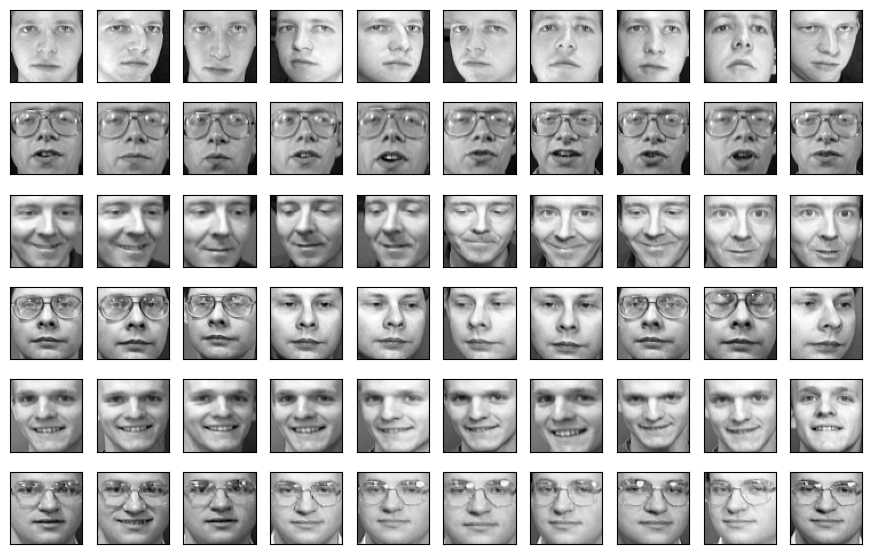

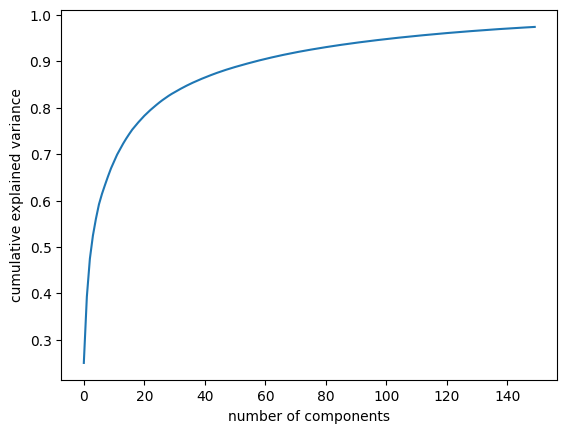

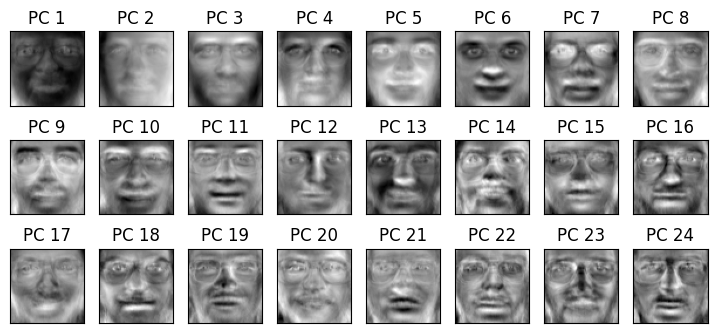

Projecting the input data on the eigenfaces orthonormal basis
Predicting people's names on the test set
done in 0.042s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       0.67      1.00      0.80         2
           3       0.75      0.75      0.75         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         3
          12       1.00      0.75      0.86         4
          13       1.00      1.00      1.00         1
          14       0.67      1.00      0.80         2
          16       1.00      0.67      0.80         6
          17       1.00      1.00      1.00         2
          18    

c:\Users\micha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\micha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\micha\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC

##Helper functions. Use when needed. 
def show_orignal_images(pixels):
	#Displaying Orignal Images
    fig, axes = plt.subplots(6, 10, figsize=(11, 7),subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()

def show_eigenfaces(pca):
	#Displaying Eigenfaces
    fig, axes = plt.subplots(3, 8, figsize=(9, 4),subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
        ax.set_title("PC " + str(i+1))
    plt.show()



## Step 1: Read dataset and visualize it
df = pd.read_csv("face_data.csv")
targets = df["target"]
pixels = df.drop(["target"],axis=1)

print (np.array(pixels).shape)

show_orignal_images(pixels)
## Step 2: Split Dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(pixels, targets)

## Step 3: Perform PCA.
pca = PCA(n_components=150).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

show_eigenfaces(pca)

## Step 4: Project Training data to PCA
print("Projecting the input data on the eigenfaces orthonormal basis")
Xtrain_pca = pca.transform(x_train)

##############

## Step 5: Initialize Classifer and fit training data
clf = SVC(kernel='rbf',C=1000,gamma=0.001)
clf = clf.fit(Xtrain_pca, y_train)


## Step 6: Perform testing and get classification report
print("Predicting people's names on the test set")
t0 = time()
Xtest_pca = pca.transform(x_test)
y_pred = clf.predict(Xtest_pca)
print("done in %0.3fs" % (time() - t0))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))




In [ ]:
import numpy as np
from PIL import Image

# Load the image
img = Image.open("your_image.jpg")

# Convert the image to a numpy array
img_array = np.array(img)

# Flatten the array to a 1D array
img_1d = img_array.flatten()

# Print the shape of the 1D array
print(img_1d.shape)


In [3]:
import os
import numpy as np
import cv2
# import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# from keras.preprocessing import image
from matplotlib import pyplot as plt
# from keras.models import Sequential
# from keras.layers import Dense, Input, Dropout, Flatten, Layer, Conv2D, Lambda, MaxPooling2D
# from keras import regularizers
# from keras.losses import categorical_crossentropy
# import keras.utils
# from keras import backend as K
import tarfile
from sklearn.metrics import accuracy_score

X = []
Y = []
class_name=[]
path="archive/lfw-funneled.tgz"
tar = tarfile.open(path, "r:gz")
counter=0
for tarinfo in tar:
    tar.extract(tarinfo.name)
    if tarinfo.name[-4:]==".jpg":
        people_name=os.path.basename(tarinfo.name).split('.')[0].rsplit('_', 1)[0]
        image = tf.keras.utils.load_img(tarinfo.name, target_size=(224, 224))
        X.append(np.array(image))
        Y.append(people_name)
    if tarinfo.isdir():
        class_name.append(os.path.basename(tarinfo.name))
        pass
tar.close()
class_name=class_name[1:]
X= np.array(X)
print("LFW images have been fetched")


NameError: name 'tf' is not defined